In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.mixture import GMM

In [12]:
data = pd.read_csv("data/zip.train", header=None, sep=" ")

In [13]:
data_with_digit = data.iloc[:,:-1]
data_without_digit = data_with_digit.iloc[:, 1:]

In [38]:
gmm = GMM(n_components=10).fit(data_without_digit)
labels = gmm.predict(data_without_digit)
data_with_digit["result"] = labels

C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function l

In [40]:
label_digit_assignment = data_with_digit[[0, 'result']]
label_digit_assignment.head()

,0,result
0,6.0,2
1,5.0,8
2,4.0,5
3,7.0,4
4,3.0,2


### calculate how often a cluster occurs for a digit

In [41]:
def count_digits(n):
    df = pd.DataFrame(data_with_digit[data_with_digit[0] == n])
    data_cluster_nr = df["result"].value_counts()
    data_cluster_nr = pd.DataFrame(data_cluster_nr)
    data_cluster_nr.reset_index(level=0, inplace=True)
    original_digit = len(data_cluster_nr)*[n]
    data_cluster_nr["original dig"] = original_digit
    data_cluster_nr = data_cluster_nr[['original dig','index','result']]
    data_cluster_nr = data_cluster_nr.rename(columns={'index': 'cluster'})
    return data_cluster_nr

### calculate the % referred to its digit (not total digits)
### calculate percentage by dividing the occurence of a digit in a cluster by the total number of this digit
### and merge into one dataframe

In [42]:
for n in range(0,9):
    data_cluster_nr = count_digits(n)
    sum_of = data_cluster_nr.sum()
    sum_of_results = sum_of["result"]
    percent = data_cluster_nr["result"]/sum_of_results*100
    data_cluster_nr["percent cluster in digit type"] = percent
 
    if n == 0:
        df_counts = data_cluster_nr
    else:
        df_counts = pd.concat([df_counts, data_cluster_nr])
        
#df_counts = df_counts[['original dig','index','result']]

### new dataframe with all %-values for graph

In [43]:
def percentage(n):
    data_cluster_nr = count_digits(n)
    sum_of = data_cluster_nr.sum()
    sum_of_results = sum_of["result"]
    percent = data_cluster_nr["result"]/sum_of_results*100
    data_cluster_nr["% cluster in digit:" + str(n)] = percent
    data_cluster_new = data_cluster_nr.drop(columns=['original dig', 'result'])
    data_cluster_new = data_cluster_new.sort_values(by=['cluster'])
    data_cluster_new = data_cluster_new.set_index('cluster')
    return data_cluster_new

In [44]:
zero = percentage(0)
one = percentage(1)
two = percentage(2)
three = percentage(3)
four = percentage(4)
five = percentage(5)
six = percentage(6)
seven = percentage(7)
eight = percentage(8)
nine = percentage(9)

result_for_bar = pd.concat([zero, one, two, three, four, five, six, seven, eight, nine], axis=1, sort=False)
result_for_bar = result_for_bar.fillna(0)
result_for_bar_T = result_for_bar.T

In [45]:
result_for_bar_T =result_for_bar_T.rename(index=str, columns={0: "C0", 1: "C1", 2: "C2", 3: "C3", 4: "C4", 5: "C5", 6: "C6", 7: "C7", 8: "C8", 9: "C9"})
result_for_bar_T

cluster,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9
% cluster in digit:0,5.443886,0.000000,34.840871,15.075377,0.000000,3.852596,0.000000,38.274707,1.340034,1.172529
% cluster in digit:1,0.000000,94.626866,0.000000,4.477612,0.696517,0.000000,0.000000,0.000000,0.000000,0.199005
% cluster in digit:2,2.462380,0.000000,1.231190,3.009576,0.136799,18.467852,0.000000,0.000000,7.797538,66.894665
% cluster in digit:3,1.823708,0.000000,6.686930,14.437690,0.455927,44.984802,0.151976,0.000000,25.075988,6.382979
% cluster in digit:4,24.846626,0.306748,0.306748,9.815951,25.766871,22.085890,14.417178,0.000000,1.073620,1.380368
% cluster in digit:5,16.546763,0.000000,8.093525,14.208633,0.179856,27.158273,2.517986,0.539568,27.697842,3.057554
% cluster in digit:6,1.656627,0.150602,18.674699,64.006024,0.000000,3.162651,0.000000,0.451807,2.409639,9.487952
% cluster in digit:7,2.325581,0.000000,0.000000,0.310078,56.279070,1.240310,38.759690,0.000000,0.930233,0.155039
% cluster in digit:8,7.933579,0.184502,1.107011,27.121771,5.719557,50.000000,0.369004,0.000000,6.642066,0.922509
% cluster in digit:9,4.037267,0.000000,0.000000,0.776398,75.310559,7.763975,11.645963,0.000000,0.465839,0.000000


### blot

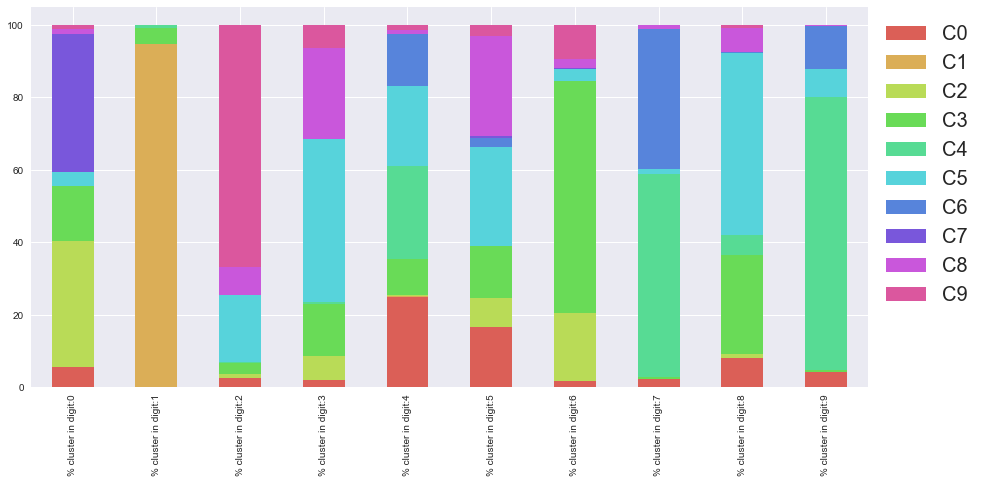

In [46]:
result_for_bar_T.loc[:,:].plot.bar(stacked=True,color=sns.color_palette("hls", 10), figsize=(15,7))

# change the size of legend
import pylab as plot
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plot.rcParams.update(params)

#change legend position
ax = plt.gca()
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)

In [ ]:
## hier nur krams zum ausprobieren

In [21]:
df_counts.head()

,original dig,cluster,result,percent cluster in digit type
0,0,5,524,43.886097
1,0,8,516,43.216080
2,0,0,115,9.631491
3,0,4,15,1.256281
4,0,1,11,0.921273


In [108]:
df_error = pd.DataFrame(df_counts[df_counts["original dig"] == 0])
df_error = df_error.sort_values(by=['percent cluster in digit type'])
df_error

,original dig,cluster,result,percent cluster in digit type
6,0,6,6,0.502513
5,0,9,7,0.586265
4,0,1,11,0.921273
3,0,4,15,1.256281
2,0,0,115,9.631491
1,0,8,516,43.216080
0,0,5,524,43.886097


In [111]:
sum_error = df_error.iloc[:-1, 2].sum()
sum_error

670

In [97]:
def error_calc(n):
    df_error = pd.DataFrame(df_counts[df_counts["original dig"] == n])
    df_error = df_error.sort_values(by=['percent cluster in digit type'])
    percentage_error = df_error.iloc[:-1, -1].sum()
    return percentage_error

In [ ]:
accurace = pd.DataFrame(df_counts)

In [99]:
for digit in range(0,9):
    error_rate = error_calc(digit)
    error_rate.append(error_rate)
    

AttributeError: 'numpy.float64' object has no attribute 'append'

In [112]:
df_cluster = pd.DataFrame(df_counts[df_counts["cluster"] == 5])
df_cluster

,original dig,cluster,result,percent cluster in digit type
0,0,5,524,43.886097
8,2,5,3,0.410397
5,3,5,2,0.303951
4,5,5,14,2.517986
1,6,5,43,6.475904
8,8,5,2,0.369004


In [54]:

percentage_df = df_counts.groupby(['original dig', 'cluster']).agg({'result': 'sum'})

percentage_df2 = df_counts.groupby(['original dig']).agg({'result': 'sum'})

x = percentage_df.div(percentage_df2, level='original dig') * 100

In [102]:
zero

,% cluster in digit:0
cluster,
0,9.631491
1,0.921273
4,1.256281
5,43.886097
6,0.502513
8,43.216080
9,0.586265


In [ ]:
## calculate how many numbers are assigned to each cluaster

In [4]:
df = pd.DataFrame(data_with_digit[data_with_digit["result"] == 1])
data_cluster_nr = df["result"].value_counts()

NameError: name 'pd' is not defined